In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import urllib.parse
def getCoordinates(address):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    # print(response)
    if(len(response)>0):
        return response[0]["lat"],response[0]["lon"]
    else:
        return np.NaN,np.NaN;

In [51]:
getCoordinates("de pinte")

('50.9924205', '3.6495958')

In [52]:
getCoordinates("ruien")

('50.7739701', '3.4860074')

In [3]:
df=pd.read_csv("tripadvisor_dataset/restaurant_listings.csv")

In [4]:
df['city'] = df["address"].str.split(', ').str[-1].str.split(" ").str[0]
eerste=df[:500]
tweede=df[500:1000]
derde=df[1000:1500]
vierde=df[1500:2000]
vijfde=df[2000:]

In [5]:
coords_eerste=eerste.apply(lambda row : getCoordinates(row["address"]),axis=1)

In [6]:
coords_eerste.to_csv("coords_eerste.csv")

In [7]:
coords_tweede=tweede.apply(lambda row : getCoordinates(row["address"]),axis=1)

In [19]:
coords_tweede.to_csv("coords_tweede.csv")

In [20]:
coords_derde=derde.apply(lambda row : getCoordinates(row["address"]),axis=1)

In [21]:
coords_derde.to_csv("coords_derde.csv")

In [22]:
coords_vierde=vierde.apply(lambda row : getCoordinates(row["address"]),axis=1)

In [23]:
coords_vierde.to_csv("coords_vierde.csv")

In [24]:
coords_vijfde=vijfde.apply(lambda row : getCoordinates(row["address"]),axis=1)

In [25]:
coords_vijfde.to_csv("coords_vijfde.csv")

In [7]:
coords_eerste

0                     (51.0548994, 3.7223248)
1             (50.7887051, 4.052819574178704)
2                                  (nan, nan)
3                     (51.0582196, 3.7222621)
4                     (51.0268308, 4.1005587)
5              (51.054784, 3.715147529390401)
6                     (51.0563899, 3.7200107)
7                     (51.0172842, 3.7352118)
8                                  (nan, nan)
9     (51.057872950000004, 3.723593150457762)
10           (51.0579981, 3.7233312548638184)
11                                 (nan, nan)
12                    (50.9238167, 3.4470247)
13                    (51.1690027, 4.1391715)
14            (50.9036447, 3.509640294271243)
15                    (50.9196162, 3.6129843)
16    (50.930108950000005, 4.041852779124971)
17                    (51.0548744, 3.7136199)
18                    (51.0542464, 3.7173773)
19                    (50.7458853, 3.6023023)
dtype: object

In [28]:
coords_tweede

500                    (51.1064198, 3.6303079)
501           (51.22722365, 3.752044665562572)
502    (51.026329399999995, 4.216531067236005)
503          (50.96607025, 4.0370028243320615)
504           (51.05699085, 3.722443696061501)
                        ...                   
995    (50.937662450000005, 4.034754187149829)
996                    (51.1857364, 3.5590313)
997                                 (nan, nan)
998            (51.1605344, 4.150798994457261)
999                    (51.2797327, 3.6260755)
Length: 500, dtype: object

In [48]:
a=pd.concat([coords_eerste,coords_tweede,coords_derde,coords_vierde,coords_vijfde])
a

0                      (51.0548994, 3.7223248)
1              (50.7887051, 4.052819574178704)
2                                   (nan, nan)
3                      (51.0582196, 3.7222621)
4                      (51.0268308, 4.1005587)
                        ...                   
995    (50.937662450000005, 4.034754187149829)
996                    (51.1857364, 3.5590313)
997                                 (nan, nan)
998            (51.1605344, 4.150798994457261)
999                    (51.2797327, 3.6260755)
Length: 1000, dtype: object

In [49]:
a=pd.DataFrame({"coord":a,"id":df.id[:1000]})

In [51]:
a["coord"]=a["coord"].astype(str)
a["coord"] =a["coord"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")

C:\Users\Raman\AppData\Local\Temp\ipykernel_11548\3791431085.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  a["coord"] =a["coord"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")


In [52]:
a[["latitude", "longitude"]]  = a["coord"].str.split(",",1, expand=True)
a['latitude'] = pd.to_numeric(a['latitude'])
a['longitude'] = pd.to_numeric(a['longitude'])
a.drop(columns=["coord"],inplace=True)

In [54]:
a.set_index("id").to_csv("coordinates2.csv")

In [13]:
original_df = pd.read_csv("../tripadvisor_dataset/restaurant_listings.csv")
original_df['city'] = original_df["address"].str.split(', ').str[-1].str.split(" ").str[0]
cities=original_df.city.unique()

In [20]:
city_centers={}
for city in cities:
    city_centers[city]=getCoordinates(city+ " Belgium")

In [22]:
for key,value in city_centers.items():
    print(key,value)

Ghent ('51.0538286', '3.7250121')
Ninove ('50.82151105', '4.003787390591782')
Dendermonde ('51.0312293', '4.098112')
Zulte ('50.9400485', '3.475305501634618')
Sint-Niklaas ('51.1646685', '4.1395124')
Kruishoutem ('50.9048236', '3.5281805')
Huise ('50.8988246', '3.5907777')
Aalst ('50.9383226', '4.0392147')
Ronse ('50.7526199', '3.6014476899065855')
Brakel ('50.7979739', '3.762778')
Sint-Laureins ('51.2417048', '3.5238418')
Maldegem ('51.2088871', '3.4452214')
Temse ('51.1253635', '4.2133313')
Zele ('51.0730461', '4.0424143')
Velzeke-Ruddershove ('50.8824839', '3.7825766')
Kruibeke ('51.17625475', '4.298036873275151')
Aalter ('51.083894', '3.4485192')
Oudenaarde ('50.8433705', '3.6041443')
Lochristi ('51.097928350000004', '3.835561373149549')
Wetteren ('50.9983603', '3.8731040535437895')
Sint-Martens-Latem ('51.020971', '3.6397549')
Gijzegem ('50.9847481', '4.0525271')
Geraardsbergen ('50.7715779', '3.8827287')
Merelbeke ('50.995756150000005', '3.74567419991459')
Belsele ('51.14633', '4

In [43]:
kaas=pd.DataFrame({"city":city_centers.keys(),"coords":city_centers.values()})
kaas


,city,coords
0,Ghent,"(51.0538286, 3.7250121)"
1,Ninove,"(50.82151105, 4.003787390591782)"
2,Dendermonde,"(51.0312293, 4.098112)"
3,Zulte,"(50.9400485, 3.475305501634618)"
4,Sint-Niklaas,"(51.1646685, 4.1395124)"
...,...,...
164,Rupelmonde,"(51.1271881, 4.290421)"
165,Kaprijke,"(51.2185075, 3.6190769)"
166,Scheldewindeke,"(50.9381419, 3.784777)"
167,Teralfene,"(50.8921419, 4.09834)"


In [45]:
kaas["coords"]=kaas["coords"].astype(str)
kaas["coords"] =kaas["coords"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")
kaas[["latitude", "longitude"]]  = kaas["coords"].str.split(",",1, expand=True)
kaas['latitude'] = pd.to_numeric(kaas['latitude'])
kaas['longitude'] = pd.to_numeric(kaas['longitude'])
kaas.drop(columns=["coords"],inplace=True)

C:\Users\Raman\AppData\Local\Temp\ipykernel_4164\300635940.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  kaas["coords"] =kaas["coords"].str.replace("(","").str.replace(")","").str.replace("\'", "").str.replace("nan","0")


<AxesSubplot:>

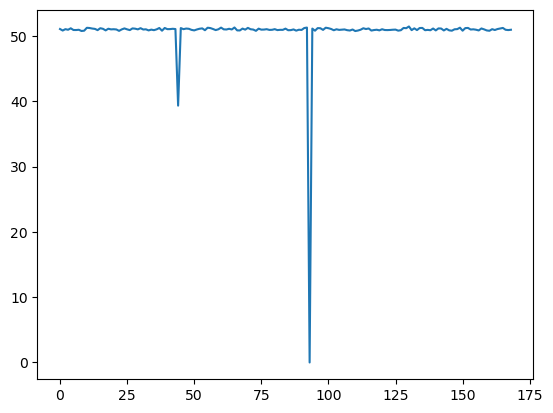

In [47]:
kaas.latitude.plot()

In [49]:
kaas.to_csv("city_centers.csv")

In [50]:
kaas[kaas["latitude"]<50]

,city,latitude,longitude
44,De,39.323702,-80.116192
93,Kluisbergen-Ruien,0.000000,0.000000


<AxesSubplot:>

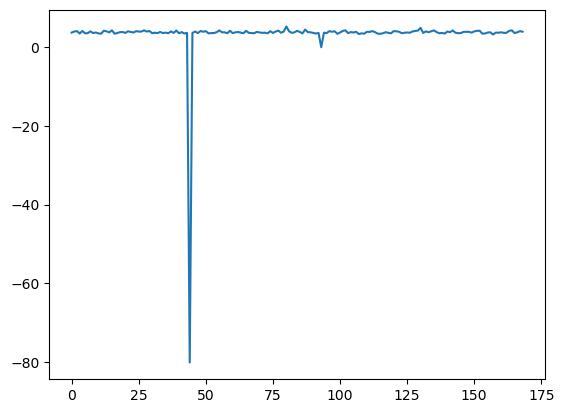

In [54]:
kaas.longitude.plot()

In [57]:
kaas[kaas["longitude"]<3]

,city,latitude,longitude
44,De,39.323702,-80.116192
93,Kluisbergen-Ruien,0.000000,0.000000
